# [E-15] 프로젝트 : 다양한 OCR모델 비교하기

In [95]:
import keras_ocr
import pytesseract
from pytesseract import Output
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import os
import cv2

## Step1. 검증용 데이터셋 준비

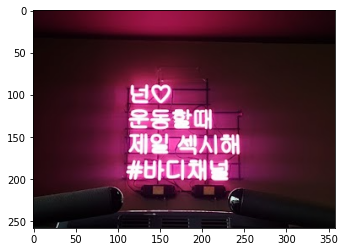

In [96]:
image_path_1 = os.getenv("HOME") + "/body.png"
img_bgr = cv2.imread(image_path_1)
img_rgb_1 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_1)
plt.show()

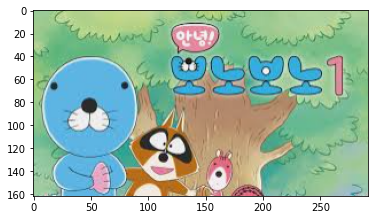

In [97]:
image_path_2 = os.getenv("HOME") + "/bonobono.png"
img_bgr = cv2.imread(image_path_2)
img_rgb_2 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_2)
plt.show()

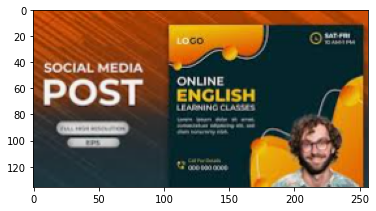

In [98]:
image_path_3 = os.getenv("HOME") + "/eng.png"
img_bgr = cv2.imread(image_path_3)
img_rgb_3 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_3)
plt.show()

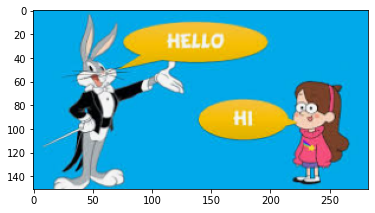

In [99]:
image_path_4 = os.getenv("HOME") + "/hi.png"
img_bgr = cv2.imread(image_path_4)
img_rgb_4 = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_4)
plt.show()

## Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

### keras-ocr로 테스트 진행

In [100]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [101]:
images = [img_rgb_1,img_rgb_2, img_rgb_3, img_rgb_4]
prediction_groups = [pipeline.recognize([img_rgb_1]), pipeline.recognize([img_rgb_2]), pipeline.recognize([img_rgb_3]), pipeline.recognize([img_rgb_4])]

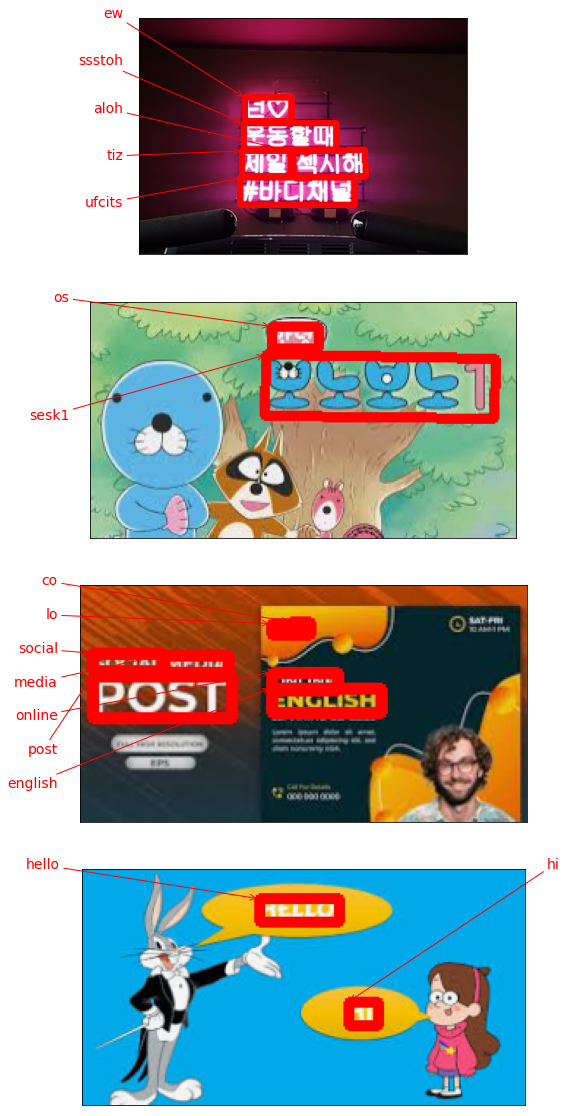

In [102]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract로 테스트 진행

In [103]:
def crop_word_regions_ko(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

work_dir = os.getenv('HOME')

In [104]:
def crop_word_regions_en(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list

In [105]:
def recognize_images_ko(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [106]:
def recognize_images_en(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [107]:
cropped_image_path_list = crop_word_regions_ko(image_path_1, work_dir)

/aiffel/0000.png


In [108]:
recognize_images_ko(cropped_image_path_list)

^

Done


In [109]:
cropped_image_path_list = crop_word_regions_ko(image_path_2, work_dir)

/aiffel/0000.png


In [110]:
recognize_images_ko(cropped_image_path_list)


Done


In [111]:
cropped_image_path_list = crop_word_regions_en(image_path_3, work_dir)

/aiffel/0000.png


In [112]:
recognize_images_en(cropped_image_path_list)


Done


In [113]:
cropped_image_path_list = crop_word_regions_en(image_path_4, work_dir)

/aiffel/0000.png


In [114]:
recognize_images_en(cropped_image_path_list)

es

Done
